<a href="https://colab.research.google.com/github/yusubaroni/yunusa-sule-bala/blob/master/Untitled133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

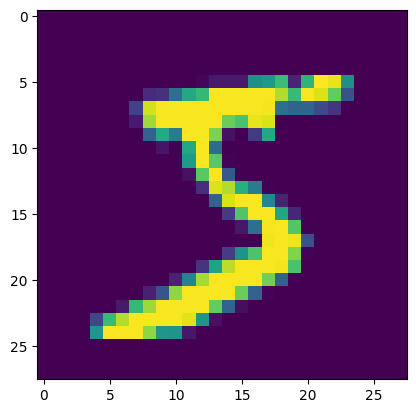

In [4]:
Image_one = X_train[0]
plt.imshow(Image_one)

In [5]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_example = y_train[0]
y_example

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
x_train = X_train.reshape(60000, 28, 28, 1)
x_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9175 - loss: 0.2821 - val_accuracy: 0.9827 - val_loss: 0.0519
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0469 - val_accuracy: 0.9867 - val_loss: 0.0405
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0303 - val_accuracy: 0.9852 - val_loss: 0.0442


<Axes: >

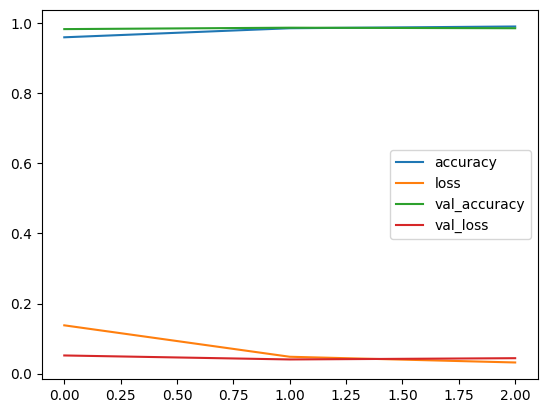

In [12]:
los = pd.DataFrame(model.history.history)
los.plot()

<Axes: >

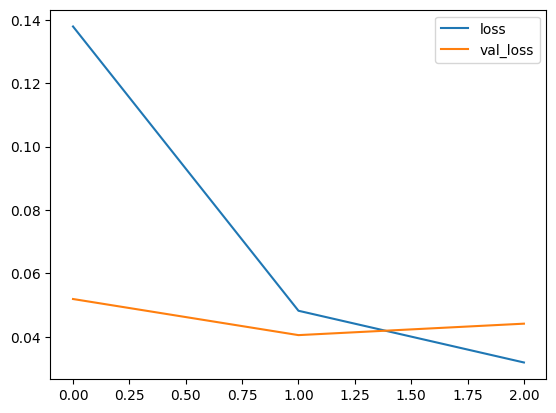

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

<Axes: >

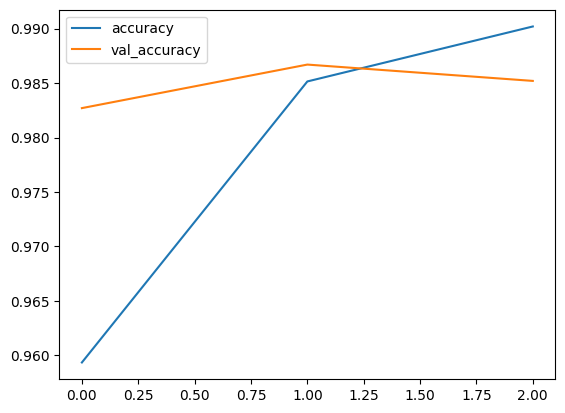

In [14]:
los2 = pd.DataFrame(model.history.history)
los2[['accuracy', 'val_accuracy']].plot()

In [16]:
model.metrics_names

['loss', 'compile_metrics']

In [17]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0529


[0.04416065663099289, 0.9851999878883362]